In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [45]:
data = pd.read_csv('Temp and CO2.csv')
data = data.iloc[:, :3]
data = data.dropna()
data

,Year,PPM,Degrees C
0,1959,315.98,0.03
1,1960,316.91,-0.03
2,1961,317.64,0.06
3,1962,318.45,0.03
4,1963,318.99,0.05
...,...,...,...
58,2017,406.76,0.92
59,2018,408.72,0.84
60,2019,411.66,0.97
61,2020,414.24,1.02


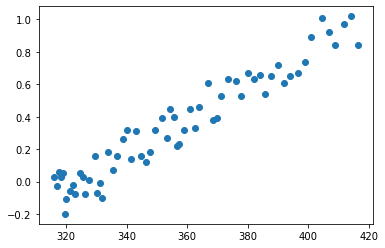

In [46]:
X = data['PPM'].values
y = data['Degrees C'].values
X = X.reshape(-1, 1)
plt.scatter(X, y)

In [47]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

PolynomialFeatures()

In [48]:
linreg = LinearRegression()
linreg.fit(X_poly, y)

y_pred = linreg.predict(X_poly)

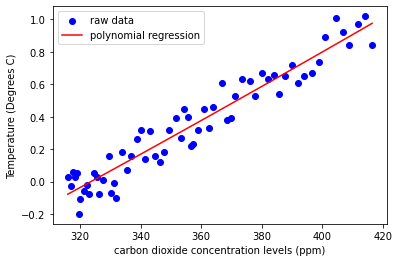

In [60]:
plt.scatter(X, y, c='blue', label='raw data')
plt.plot(X, y_pred, c='red', label='polynomial regression')
plt.xlabel('carbon dioxide concentration levels (ppm)')
plt.ylabel('Temperature (Degrees C)')
plt.legend()

In [51]:
print(linreg.coef_)
print(linreg.intercept_)

[0.00000000e+00 8.33801916e-03 2.94960507e-06]
-3.007608550127321


In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(data['Degrees C'], y_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.089
